In [1]:
import model_utils as mu
mu.DEATH_RATE = 0.36
mu.ICU_RATE = 0.78
mu.HOSPITAL_RATE = 2.18
mu.SYMPTOM_RATE = 10.2
mu.INFECT_2_HOSPITAL_TIME = 11
mu.HOSPITAL_2_ICU_TIME = 4
mu.ICU_2_DEATH_TIME = 4
mu.ICU_2_RECOVER_TIME = 7
mu.NOT_ICU_DISCHARGE_TIME = 5

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
daily_metrics, cum_metrics, model_beta = mu.get_metrics_by_country('Iraq', lockdown_date='20200322', relax_date='20200411')

NumExpr defaulting to 4 threads.
C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning: divide by zero encountered in log
  log_daily_death = np.log(daily_local_death_new)


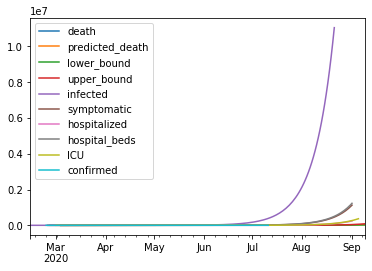

In [5]:
daily_metrics.plot()

In [6]:
import plotly.offline as py_offline
import cufflinks as cf
cf.go_offline()
py_offline.__PLOTLY_OFFLINE_INITIALIZED = True

In [7]:
daily_metrics.iplot()

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(0, 1, 4361.040752259643)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(1, 1, 3657.3384568547863)
(5, 1, 3305.9267693793495)
(10, 1, 3305.9267693793495)
(50, 1, 3305.9267693793495)


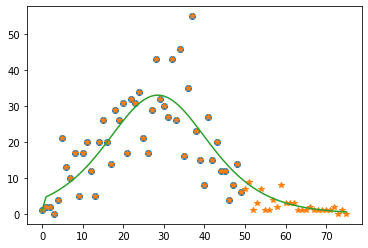

In [4]:
import SEIR

In [12]:
Infected = (100/mu.DEATH_RATE)*daily_metrics.death

In [15]:
 relax_date='20200411'

In [17]:
Infected = Infected[Infected.index>=relax_date]

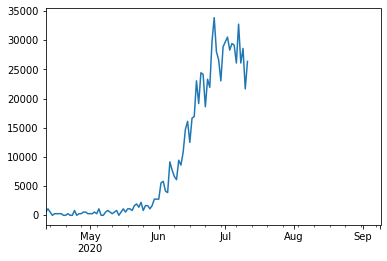

In [18]:
Infected.plot()

In [19]:
Infected.iloc[0]

555.5555555555555

In [33]:
I = np.array(Infected.iloc[:])
Ipast = I[0:70]
N = 38430000 # the population of Iraq
i0 = Infected.iloc[0]
E0 = i0 * range(6)
I0 = [i0]

In [34]:
best = np.inf
res = (0, 0, 0)
t = np.arange(len(Ipast))

for e0 in E0:
    for i0 in I0:    
        y0 = [N-e0-i0, e0, i0, 0]
        opt, val = SEIR.minimization(y0, t, Ipast, 10)
        if (val < best):
            besty0 = y0
            res = opt
            best = val
        print((e0, i0, best))

tau = np.arange(len(I))
fitted = SEIR.dynamics(besty0, tau, *res)[:,2]


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(0.0, 555.5555555555555, 85097310.49953611)
(555.5555555555555, 555.5555555555555, 85097310.49953611)
(1111.111111111111, 555.5555555555555, 73194738.42394625)
(1666.6666666666665, 555.5555555555555, 73194738.42394625)
(2222.222222222222, 555.5555555555555, 73194738.42394625)
(2777.777777777778, 555.5555555555555, 73194738.42394625)


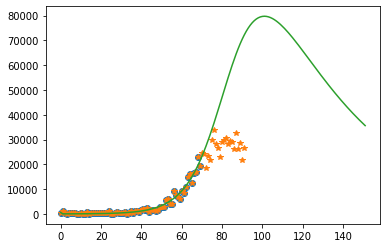

In [35]:
plt.plot(t, Ipast, 'o')
plt.plot(tau, I, '*')
plt.plot(tau, fitted)
plt.show()

Not working when data is not over peaked

In [40]:
I = np.array(Infected.iloc[:])
Ipast = I[0:80]
N = 38430000 # the population of Iraq
i0 = Infected.iloc[0]
E0 = i0 * range(6)
I0 = [i0]

In [41]:
best = np.inf
res = (0, 0, 0)
t = np.arange(len(Ipast))

for e0 in E0:
    for i0 in I0:    
        y0 = [N-e0-i0, e0, i0, 0]
        opt, val = SEIR.minimization(y0, t, Ipast, 10)
        if (val < best):
            besty0 = y0
            res = opt
            best = val
        print((e0, i0, best))

tau = np.arange(len(I))
fitted = SEIR.dynamics(besty0, tau, *res)[:,2]


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(0.0, 555.5555555555555, 215446137.25566092)
(555.5555555555555, 555.5555555555555, 215446137.25566092)
(1111.111111111111, 555.5555555555555, 215446137.25566092)
(1666.6666666666665, 555.5555555555555, 215446137.25566092)
(2222.222222222222, 555.5555555555555, 215446137.25566092)
(2777.777777777778, 555.5555555555555, 215446137.25566092)


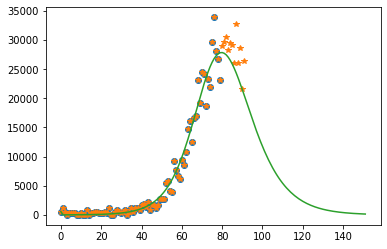

In [42]:
plt.plot(t, Ipast, 'o')
plt.plot(tau, I, '*')
plt.plot(tau, fitted)
plt.show()

Only work if we have data near peak